# IMDB movie review

We all have at one time or the other have checked the IMDB rating of certain films in the internet. Movie fanatics like me always seem to rate movies based on IMDB ratings since I feel its quite transparent. So, have you wondered how the ratings are made? 

Well we are going to uncover that here only.

Basically IMDB movie reviews are Deep Learning tasks that take into account the movie reviews and gives their ratings based on that.

In this notebook we will use the IMDB dataset, prebuilt in Keras to make our own movie review system. But, we won't go much deeper and use Dropout and all, instead we are going to keep it simple and just place the  basics in.

So lets dive in by importing the necessary packages

Don't get frightened by seeing imports that was very hard to guess in the very first cell only, but I imported them.
If you are wondering how I did them, well, I have this habit of coming back and importing the necessary packages in the first cell only.

In [1]:
#Importing the necessary packages
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.datasets import imdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now that we are done with loading our packages, lets dive into loading our dataset.

## Step 1: Loading the dataset

In [2]:
#loading the dataset and taking the top 10,000 most used words for the word dictionary
(review_train , label_train) , (review_test , label_test) = imdb.load_data(num_words = 10000) 

You might be wondering how did I know to put num_words = 10,000 to cut the dictionary and get the top 10,000 most used words only.

Well, I just looked up in the Keras Documentation from the following link:
https://keras.io/api/datasets/imdb/

The training data of features are basically a collection of the indexes. 
To check the words, keras presents a get_word_index() function that returns a word_index dictionary where the keys are the words and the values are their indexes.

Now to check what sentence were written we need to reverse the dictionary and then find the words.

## Step 2: Analyzing the Data

In [3]:
y_train = np.asarray(label_train).astype('float32')
y_test = np.asarray(label_test).astype('float32')

In [4]:
#Loading the word_to_index dictionary

word_to_index = imdb.get_word_index()
word_to_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

There we have loaded the dictionary. But to visualize one review we need to reverse this dictionary and make the keys as the values.

In [5]:
index_to_word = {value : key for (key,value) in word_to_index.items()} #inverting the dictionary word_to_index
index_to_word

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [6]:
decoded_review = ' '.join([index_to_word.get(i - 3 , '?') for i in review_train[0]]) #getting the exact review
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
def vectorize_sequence(sequences , dimension = 10000): #function to transfer the values into one got vector
    
    '''
    Returns a one hot vector of the sequences of the dimension.
    '''
    result = np.zeros((len(sequences) , dimension))
    
    for i,sequence in enumerate(sequences):
        result[i , sequence] = 1
    
    return result

In [8]:
X_train = vectorize_sequence(review_train , dimension = 10000) #one hot encoding of the training data
X_test = vectorize_sequence(review_train , dimension = 10000) #one hot encoding of test data

In [9]:
X_train[0] #checking one of the training example

array([0., 1., 1., ..., 0., 0., 0.])

Its always better to keep a set of values for validation set. We are going to keep a 10,000 values from training set for validation.

In [10]:
X_val = X_train[:10000] # setting the feature values for validation
y_val = y_train[:10000] # setting the label values for validation

partial_X_train = X_train[10000:] #setting the feature values for training
partial_y_train = y_train[10000:] #setting the label values for training

We are all set now, to feed our data into our model.

## Step 3: Modeling

For the Neural Network we are going to following Neural Network architecture:

1. Dense Layer with 16 activation units of relu
2. Dense Layer with 16 activation units of relu
3. Dense Layer with 1 activation units of sigmoid

In [11]:
#Building our model
model = Sequential()

model.add(Dense(16 , activation = 'relu' , input_shape = (10000 , )))
model.add(Dense(16 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

In [12]:
model.summary() #summarizing and checking the number of parameters of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']) #compiling our model

In [14]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 128,
                    validation_data = (X_val , y_val),
                    ) #training our data

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 318us/sample - loss: 0.3905 - accuracy: 0.8443 - val_loss: 0.2825 - val_accuracy: 0.8885
Epoch 2/20
15000/15000 [==============================] - 2s 109us/sample - loss: 0.2080 - accuracy: 0.9235 - val_loss: 0.2809 - val_accuracy: 0.8875
Epoch 3/20
15000/15000 [==============================] - 2s 102us/sample - loss: 0.1531 - accuracy: 0.9445 - val_loss: 0.2999 - val_accuracy: 0.8827
Epoch 4/20
15000/15000 [==============================] - 2s 103us/sample - loss: 0.1163 - accuracy: 0.9593 - val_loss: 0.3367 - val_accuracy: 0.8809
Epoch 5/20
15000/15000 [==============================] - 1s 98us/sample - loss: 0.0908 - accuracy: 0.9693 - val_loss: 0.3888 - val_accuracy: 0.8755
Epoch 6/20
15000/15000 [==============================] - 1s 100us/sample - loss: 0.0685 - accuracy: 0.9763 - val_loss: 0.4398 - val_accuracy: 0.8720
Epoch 7/20
15000/15000 [===========================

In [15]:
df = pd.DataFrame(history.history)

df.head() #making our loss and accuracy dataframe

,loss,accuracy,val_loss,val_accuracy
0,0.390484,0.844267,0.282541,0.8885
1,0.207966,0.923533,0.280940,0.8875
2,0.153051,0.944467,0.299931,0.8827
3,0.116307,0.959333,0.336691,0.8809
4,0.090772,0.969267,0.388809,0.8755


Its always better to visualize the loss and accuracy to move ahead. So, lets do that.

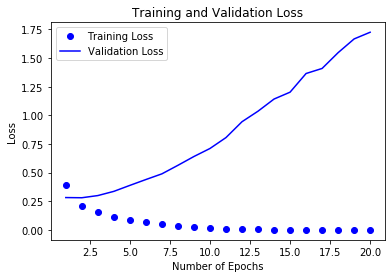

In [16]:
#Loss Plot
epochs = range(1 , len(df) + 1)

plt.plot(epochs , df['loss'] , 'bo' , label = 'Training Loss')
plt.plot(epochs , df['val_loss'] , 'b' , label = 'Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()

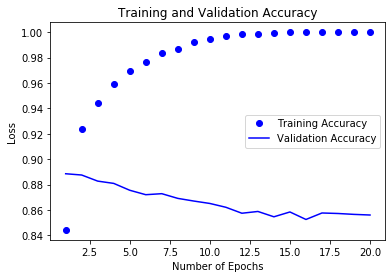

In [17]:
#Accuracy Plot
epochs = range(1 , len(df) + 1)

plt.plot(epochs , df['accuracy'] , 'bo' , label = 'Training Accuracy')
plt.plot(epochs , df['val_accuracy'] , 'b' , label = 'Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()

Our model overfits the data so it would be preferential to stop our model at epoch 4 to get highest accuracy.

In [18]:
#Building our new model
model1 = Sequential()

model1.add(Dense(16 , activation = 'relu' , input_shape = (10000 , )))
model1.add(Dense(16 , activation = 'relu'))
model1.add(Dense(1 , activation = 'sigmoid'))

In [19]:
model1.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy']) #Compiling our model

In [20]:
#training the new model

history = model1.fit(X_train,
                    y_train,
                    epochs = 4,
                    batch_size = 512,
                    )

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 68us/sample - loss: 0.4775 - accuracy: 0.8196
Epoch 2/4
25000/25000 [==============================] - 1s 49us/sample - loss: 0.2743 - accuracy: 0.9062
Epoch 3/4
25000/25000 [==============================] - 1s 46us/sample - loss: 0.2092 - accuracy: 0.9262
Epoch 4/4
25000/25000 [==============================] - 1s 46us/sample - loss: 0.1726 - accuracy: 0.9386


In [21]:
model1.evaluate(X_test , y_test , verbose = 2) #Evaluating our model

25000/1 - 3s - loss: 1.8761 - accuracy: 0.4968


[2.080352459526062, 0.49676]

We are going to keep our model at this only, even though our simple approach didn't do better on our test data. But, to just keep it as a beginner thing we are going to keep it here and do some 